# Red neuronal de Regresion

Crea una red neuronal para predecir las calorias segun la cantidad de **azucares, fibra y proteinas**.


In [77]:
# librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# librrerias para preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librerias para crear la red neuronal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

## 1. Leer la informacion del dataset cereal.csv

In [78]:
data = pd.read_csv('Datasets/cereal.csv')
data

,nombre,fabricante,tipo,calorias,proteinas,grasas,sodio,fibra,carbohidratos,azucares,potasio,vitaminas,caducidad,peso,tazas,valoracion
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0.684030
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,0.339837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0.594255
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0.937049
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,0.343848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,0.391062
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,0.277533
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,0.497874
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,0.515922


## 2. Separar las variables de entrada y salida de la red

In [79]:
# Datos de entrada -> azucares, fibra y proteinas
X = data[['azucares', 'fibra', 'proteinas']]
# Si conocieras el indice de las columnas podrías hacerlo así:
# X = data.iloc[:, [9, 7, 4]]   
X

,azucares,fibra,proteinas
0,6,10.0,4
1,8,2.0,3
2,5,9.0,4
3,0,14.0,4
4,8,1.0,2
...,...,...,...
72,3,0.0,2
73,12,0.0,1
74,3,3.0,3
75,3,3.0,3


In [80]:
# Salida -> calorias
y = data[['calorias']]
# Si conocieras el indice de la columna podrías hacerlo así:
# y = data.iloc[:, 3]
y

,calorias
0,70
1,120
2,70
3,50
4,110
...,...
72,110
73,110
74,100
75,100


## 3. Graficar la informacion para vizaualisar su distribucion

Text(0.5, 0, 'Proteinas')

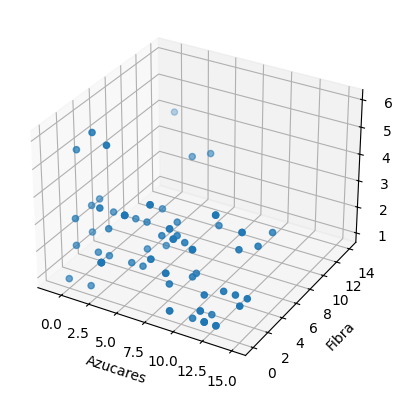

In [81]:
# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D
ax.scatter(X['azucares'], X['fibra'], X['proteinas'])

# Etiquetas 
ax.set_xlabel('Azucares')
ax.set_ylabel('Fibra')
ax.set_zlabel('Proteinas')

## 4. Separar los datos de entrenamiento y de prueba

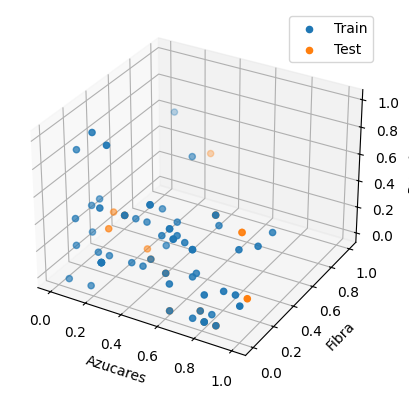

In [82]:
# Separar los datos de entrenamiento (80%) y de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizar los datos utilizando los valores de entrenamiento
# para normalizar nuestros datos de prueba
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D
ax.scatter(X_train_norm[:,0], X_train_norm[:,1], X_train_norm[:,2], label='Train')
ax.scatter(X_test_norm[:,0], X_test_norm[:,1], X_test_norm[:,2], label='Test')

# Etiquetas 
ax.set_xlabel('Azucares')
ax.set_ylabel('Fibra')
ax.set_zlabel('Proteinas')
ax.legend()



## 5. Crear una arquitectura para la red

In [83]:
model = Sequential([
    # Capa de entrada
    Dense(30, activation = 'relu', input_shape = [3]),
    # Capas ocultas
    Dense(30, activation = 'relu'),
    Dense(15, activation = 'relu'),
    # Capa de salida
    Dense(1, activation = 'linear')
])

model.summary()

c:\Users\juanp\Programacion\Redes-Neuronales-Notebook\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 30)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,531 (5.98 KB)

 Trainable params: 1,531 (5.98 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Compilar y entrenar la red

In [84]:
model .compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse']
)
history = model.fit(
    X_train_norm, y_train,
    epochs = 300
)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 11683.8467 - mse: 11683.8467
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11675.6436 - mse: 11675.6436
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11667.3955 - mse: 11667.3955
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11659.5430 - mse: 11659.5430
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11651.2695 - mse: 11651.2695
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11642.4941 - mse: 11642.4941
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11633.3809 - mse: 11633.3809
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11624.0596 - mse: 11624.0596
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11614.1719 - mse: 11614.1719
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11603.5742 - mse: 11603.5742
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11592.0137 - mse: 11592.0137
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

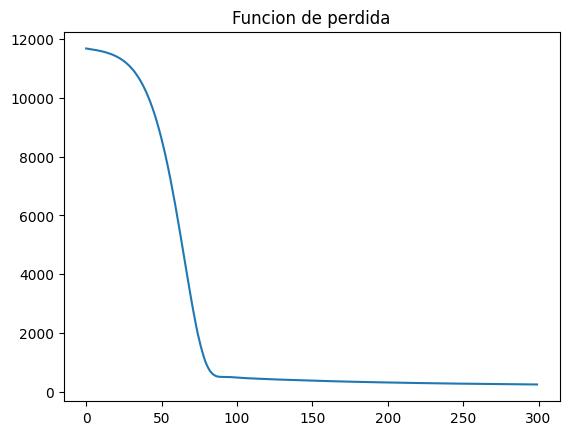

In [85]:
# Graficar la funcion de perdida
history_df = pd.DataFrame(history.history)

plt.title('Funcion de perdida')
plt.plot(history_df['loss'])

## 7. Evaluar los reultados

In [86]:
loss, mse = model.evaluate(X_test_norm, y_test)
print(f'La red puede predecir las calorias con un error de +-{mse} calorias')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 191.5463 - mse: 191.5463
La red puede predecir las calorias con un error de +-191.5463409423828 calorias


### Calcular el error de los datos de entrenamiento

In [87]:
Y_pred_train = model.predict(X_train_norm)
error_train = abs(np.array(y_train) - Y_pred_train[0])
error_train

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[10.8058548],
       [ 9.1941452],
       [19.1941452],
       [ 0.8058548],
       [ 0.8058548],
       [ 9.1941452],
       [39.1941452],
       [ 0.8058548],
       [10.8058548],
       [50.8058548],
       [ 9.1941452],
       [29.1941452],
       [ 9.1941452],
       [49.1941452],
       [ 9.1941452],
       [39.1941452],
       [ 9.1941452],
       [ 9.1941452],
       [10.8058548],
       [ 9.1941452],
       [ 9.1941452],
       [ 9.1941452],
       [50.8058548],
       [50.8058548],
       [ 9.1941452],
       [ 9.1941452],
       [10.8058548],
       [ 9.1941452],
       [ 9.1941452],
       [ 9.1941452],
       [39.1941452],
       [ 0.8058548],
       [59.1941452],
       [ 0.8058548],
       [ 9.1941452],
       [19.1941452],
       [ 0.8058548],
       [ 0.8058548],
       [19.1941452],
       [ 9.1941452],
       [ 0.8058548],
       [ 9.1941452],
       [ 0.8058548],
       [ 9.1941452],
       [ 0.8058548],
       [ 9.1941452],
       [ 0.8058548],
       [20.80

### Calcular el error en los datos de prueba

In [88]:
Y_pred_test = model.predict(X_test_norm)
error_test = abs(np.array(y_test) - Y_pred_test[0])
error_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[ 2.6030426],
       [12.6030426],
       [12.6030426],
       [37.3969574],
       [42.6030426],
       [ 7.3969574],
       [ 2.6030426],
       [ 7.3969574],
       [17.3969574],
       [12.6030426],
       [17.3969574],
       [ 7.3969574],
       [ 2.6030426],
       [12.6030426],
       [12.6030426],
       [ 2.6030426]])

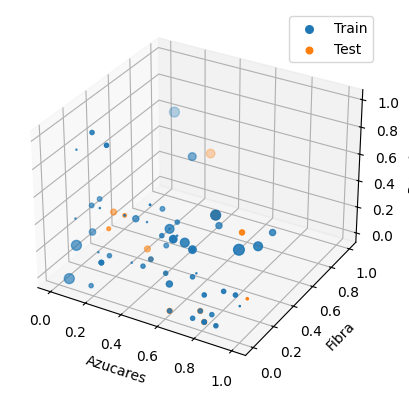

In [ ]:
# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D
ax.scatter(X_train_norm[:,0], X_train_norm[:,1], X_train_norm[:,2], label ='Train', s = error_train)
ax.scatter(X_test_norm[:,0], X_test_norm[:,1], X_test_norm[:,2], label ='Test', s = error_test)

# Etiquetas 
ax.set_xlabel('Azucares')
ax.set_ylabel('Fibra')
ax.set_zlabel('Proteinas')
ax.legend()